In [86]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin, _fit_context
from sklearn.metrics import euclidean_distances
from sklearn.utils.multiclass import check_classification_targets
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.estimator_checks import check_estimator
import cvxpy as cp
from typing import Literal
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from src.regressors.linear_regression_tweak import LinearRegressorTweak

In [87]:
model = LinearRegressorTweak(penalty= 1, bound= 'lower')
# check_estimator(model)

In [88]:
X = pd.DataFrame(np.arange(100).reshape(100, 1))
y = np.zeros((100, ))
model.fit(X, y)

RMSE Value: 4.590330094396776e-25
Violation_value: 1.1293314883467446e-12


LinearRegressorTweak(bound='lower')

In [89]:
np.random.rand()

0.08921641514157097

In [90]:
def plot_functions_2d(a: float, b: float, X, y):
    x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10
    y1 = 100*x + 100*np.cos(x) # Function x^2
    y2 = a * x + b  # Function y = a*x + b

    plt.figure(figsize=(8, 4))
    plt.plot(x, y1, label="x^2", color='blue', linestyle='--')
    plt.plot(x, y2, label=f"{a}*x + {b}", color='red')
    plt.scatter(X, y)
    
    plt.title("Plot of x^2 and y = a*x + b")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_3d_functions(a: float, b: float, c: float):
    x1 = np.linspace(-10, 10, 400)
    x2 = np.linspace(-10, 10, 400)
    X1, X2 = np.meshgrid(x1, x2)
    
    # Function 1: z = x1^2 + x2^2
    Z1 = X1**2 + X2**3
    
    # Function 2: z = a*x1 + b*x2 + c
    Z2 = a * X1 + b * X2 + c
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface for the first function
    ax.plot_surface(X1, X2, Z1, cmap='viridis', alpha=0.7)
    
    # Plot the surface for the second function
    ax.plot_surface(X1, X2, Z2, cmap='coolwarm', alpha=0.6)
    
    ax.set_title("3D Plot of x1^2 + x2^2 and y = a*x1 + b*x2 + c")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("z")
    
    plt.show()

def run_experiment(penalty, bound, positive, negative):

    # 1d Data
    X = np.linspace(-10, 10, 50).reshape((-1, 1)) 
    y = (100*X+ 100*np.cos(X)).reshape((-1, ))

    model_2d = LinearRegressorTweak(penalty=penalty, bound=bound, positive=positive, negative=negative)
    model_2d.fit(X, y)

    a, b = float(model_2d.coef_[0]), float(model_2d.intercept_)

    plot_functions_2d(a, b, X, y)

    # 2d Data
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X = np.array([[u, v] for u in x1 for v in x2])
    
    y = X[:, 0]**2 + X[:, 1]**3

    model_3d = LinearRegressorTweak(penalty=penalty, bound=bound, positive=positive, negative=negative)
    model_3d.fit(X, y)

    a, b, c = float(model_3d.coef_[0]), float(model_3d.coef_[1]), float(model_3d.intercept_)

    plot_3d_functions(a, b, c)

    return model_2d, model_3d



RMSE Value: 690243.9417686182
Violation_value: 0.0


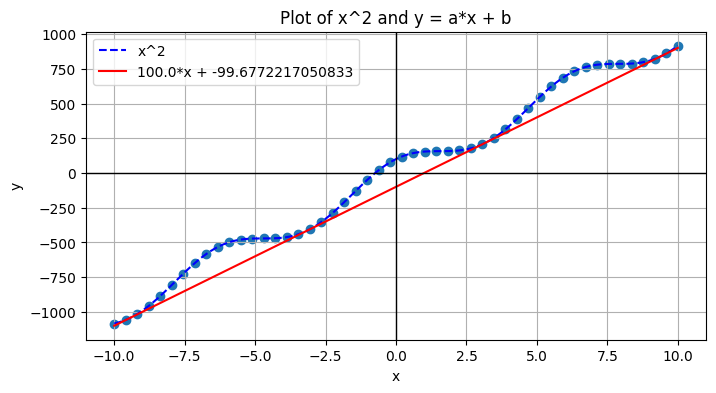

RMSE Value: 1101931921.3890784
Violation_value: 132.99692568991765


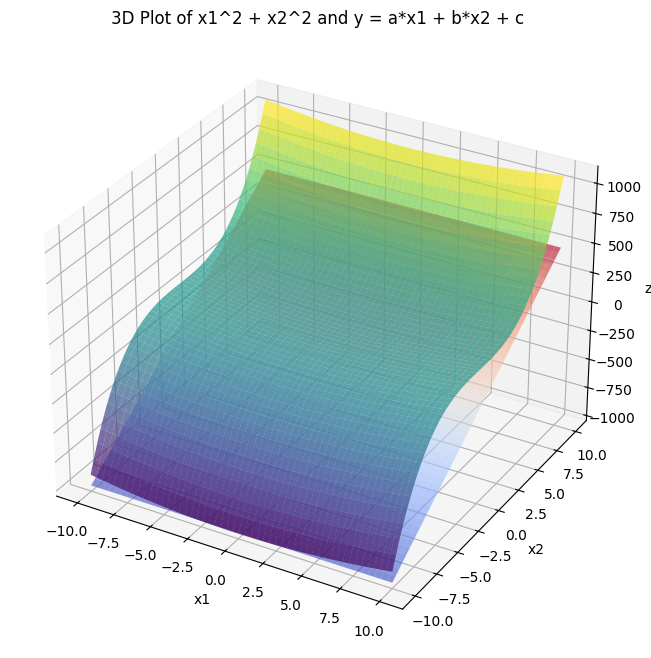

In [91]:
# Parameters
penalty = 100000
bound = 'lower'
positive = ()
negative = ()

model_2d, model_3d = run_experiment(penalty, bound, positive, negative)

In [80]:
X = np.random.random((5, 2))
X

array([[0.56174955, 0.20573675],
       [0.05207438, 0.0197125 ],
       [0.85035809, 0.39087091],
       [0.53981011, 0.45352384],
       [0.26131931, 0.31781747]])

In [81]:
model_3d.predict(X)

array([-231.42231705, -245.31527108, -217.59583846, -212.91669452,
       -223.0517295 ])

In [84]:
X = np.random.random((5, 1))
X

array([[0.23193876],
       [0.50618813],
       [0.32680172],
       [0.3591978 ],
       [0.00478721]])

In [85]:
model_2d.predict(X)

array([-76.48334591, -49.058409  , -66.99704933, -63.75744146,
       -99.19850025])